# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Для этого необходимо разработь и обосновать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
Защита данных не должна ухудшать качество моделей машинного обучения. Подбирать лучшую модель не требуется.

Данные хранятся в файле insurance.csv и содержат персональную информацию:
- Пол
- Возраст
- Зарплата 
- Члены семьи
- Страховые выплаты

План:
1. Загрузка данных
2. Алгоритм преобразования и его обоснование
3. Проверка алгоритма
4. Общий вывод


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Загрузка данных

In [2]:
df = pd.read_csv('f:/yandex-practicum/datasets/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


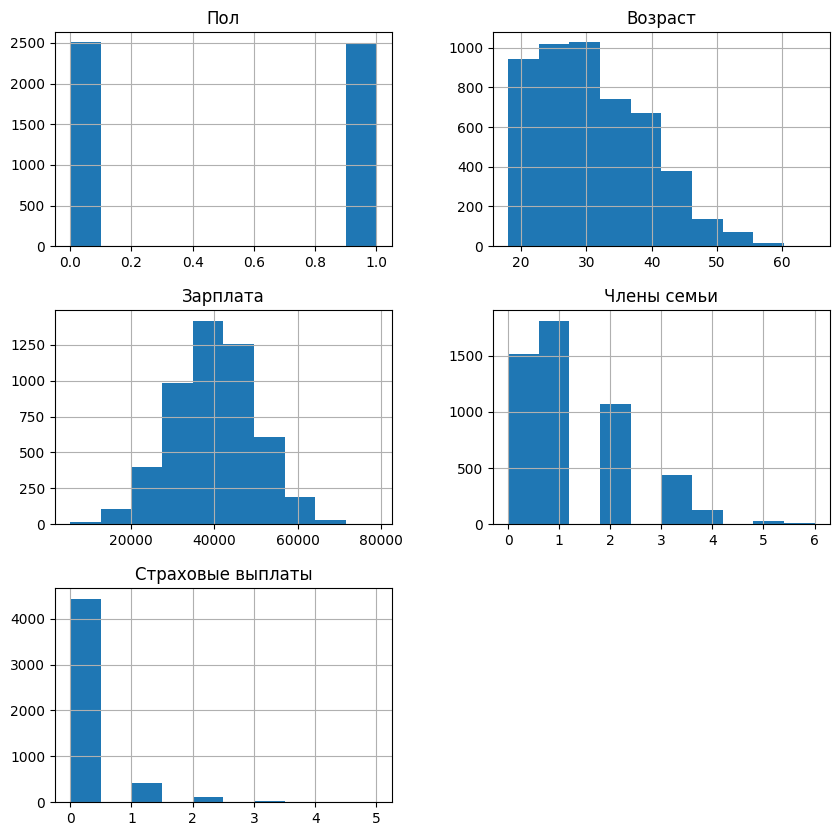

In [3]:
# Просмотр данных 
df.hist(figsize=(10,10));

In [4]:
# выделение и просмотр признаков
features = df.drop('Страховые выплаты',axis=1)
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [5]:
# выделение и просмотр целевого празнака
target = df['Страховые выплаты']
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

В данных содержится 500 записей, пропуски отстутсвуют.
Выделены признаки и целевой признак.

## Алгоритм преобразования

Для преобразования данных, содержащих персональную информацию, предлагается выполнить умножение матрицы (строки) признаков на обратимую "Защитную матрицу". При этом значения признаков исказятся и их восстановление будет затруднено без защитной матрицы. Обучение модели можно производить как по исходной выборке, так и по искаженной выборке, т.к. параметры моделей связаны.

### Обоснование алгоритма преобразования данных

**Формулы линейной регрессии.**

Предсказания:
$$
a = Xw \ (1)
$$
Задача обучения:
$$
w = \arg\min_w MSE(Xw, y) \ (2)
$$
Формула обучения:
$$
w = (X^T X)^{-1} X^T y \ (3)
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Доказать**, что качество линейной регрессии при умножении признаков $X$ на обратимую матрицу $P$ не изменится, и параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w'$ связаны как $w$ = $Pw'$.

**Доказательство:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказать:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w' = a'
$$
Доказательство:
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$

$$ w' = ((P^T (X^T X)) P)^{-1} (XP)^T y$$
$$w' = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y$$
$$(P^T)^{-1} P^T = (P^{-1})^T P^T = (P P^{-1})^T = E$$
$$w' = P^{-1}(X^T X)^{-1} X^T y $$
$$w' = P^{-1} w$$

$$a' = X'w'=XPP^{-1}w = XEw=Xw=a$$

### Алгоритм защиты данных

Для преобразования данных, содержащих персональную информацию, предлагается выполнить умножение матрицы (строки) признаков на обратимую "Защитную матрицу". При этом значения признаков исказятся и их восстановление будет затруднено без защитной матрицы. Обучение модели можно производить как по исходной выборке, так и по искаженной выборке, т.к. параметры моделей связаны. В первом варианте можно встроить "защитную матрицу" в модель и восстанавливать признаки или корректировать параметры модели перед предсказанем. На втором варианте, если модель обучена по искаженной выборке, "защитная" матрица будет известна только на этапе искажения признаков, что более предпочтительно. 

Основные этапы защиты данных с применением алгоритма преобразования матриц:
1. Создание и сохранение псевдослучайной "защитной" обратимой квадратной матрицы. число строк и столбцов матрицы должно равняться числу признаков. 
2. Искажение обучающих признаков путем домножения матрицы признаков на "защитную" матрицу $X' =  XP$
3. Создание и обучение модели линейной регрессии.
4. Предсказание моделью числа выплат по искаженным признакам. Признаки могут искажаться на этапе сохранения введенных данных, за счет чего будет обеспечена защита персональных данных.

## Проверка алгоритма

In [6]:
# Создание "защитной" матрицы, проверка на обратимость 
k = features.shape[1]
matrix_protection = np.random.RandomState(12345).normal(size=(k,k))
print(matrix_protection, '\nОпределитель\n', np.linalg.det(matrix_protection), '\nОбратная матрица\n', np.linalg.inv(matrix_protection))


[[-0.20470766  0.47894334 -0.51943872 -0.5557303 ]
 [ 1.96578057  1.39340583  0.09290788  0.28174615]
 [ 0.76902257  1.24643474  1.00718936 -1.29622111]
 [ 0.27499163  0.22891288  1.35291684  0.88642934]] 
Определитель
 -3.0255129130001897 
Обратная матрица
 [[-1.31136747  0.3921804   0.18868055 -0.67088287]
 [ 1.75872714  0.14106138 -0.17773045  0.79787127]
 [-0.41702659 -0.22854768  0.3550602   0.33039819]
 [ 0.58912996  0.19073027 -0.5545481   0.6259302 ]]


Определитель не нулевой, значит матрица обратима. Расчет обратной матрицы успешен.

In [7]:
# Искажение признаков
features_protected = features @ matrix_protection
features_protected.columns = features.columns
features_protected.head(3)

,Пол,Возраст,Зарплата,Члены семьи
0,38224.186641,61881.000420,49961.234837,-64280.684721
1,29313.558467,47428.845564,38278.822267,-49242.555394
2,16206.481556,26215.538233,21153.670838,-27212.472653


In [8]:
#Выделение обучающей и тестовой выборок по исходным данным
# Обучение модели, проверка качества модели (критерий R2) на НЕискаженных данных
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=12345)
model = LinearRegression()
model.fit(X_train,y_train)
print(f'Коэффициент R2 модели на исходных данных: для обучающей выборки - {r2_score(y_train, model.predict(X_train)):.3f}, для тестовой выборки - {r2_score(y_test, model.predict(X_test)):.3f}')


Коэффициент R2 модели на исходных данных: для обучающей выборки - 0.424, для тестовой выборки - 0.427


In [9]:
#Выделение обучающей и тестовой выборок по искаженным данным
# Обучение модели, проверка качества модели (критерий R2) на искаженных данных
X_train, X_test, y_train, y_test = train_test_split(features_protected, target, test_size=0.33, random_state=12345)
model = LinearRegression()
model.fit(X_train,y_train)
print(f'Коэффициент R2 модели на искаженных данных: для обучающей выборки - {r2_score(y_train, model.predict(X_train)):.3f}, для тестовой выборки - {r2_score(y_test, model.predict(X_test)):.3f}')

Коэффициент R2 модели на искаженных данных: для обучающей выборки - 0.424, для тестовой выборки - 0.427


**Вывод: Качество модели не меняется при искажении признаков и ее переобучении ни на обучающей выборке, ни на тестовой.**
 
 

## Общий вывод
1. Загружены данные клиентов страховой компании "Хоть потоп"
2. Предложен и обоснован алгоритм защиты персональных данных. 
- Доказано, что качество линейной регрессии при умножении признаков 𝑋  на обратимую матрицу не меняется, а также существование связи между параметрами моделей линейной регрессии, обученных на исходных и искаженных данных.
- Описаны основные этапы защиты данных с применением алгоритма преобразования матриц.
4. Реализован алгоритм преобразования данных и экспериментально показано, что качество модели не меняется.